In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df = pd.read_csv("salary_prediction_data.csv")

display(df.shape)
df.head()

(1000, 7)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [37]:
X = df[["Age", "Experience"]]
X

,Age,Experience
0,63,8
1,59,11
2,61,28
3,45,29
4,26,25
...,...,...
995,25,8
996,30,24
997,44,18
998,31,27


In [38]:
y = df.iloc[:,-1]
y

0       84620.053665
1      142591.255894
2       97800.255404
3       96834.671282
4      132157.786175
           ...      
995     64683.389864
996     74468.205020
997     98207.026024
998    108544.922720
999     71077.000066
Name: Salary, Length: 1000, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)
y_pred

array([119194.62367146,  89768.77484954, 112018.55990397, 110281.33572522,
       114584.30357768, 114891.65581901, 116468.50962011,  99697.65674884,
        89675.23762049, 117417.30689831, 106005.10842696,  95595.15186845,
       116628.87999776, 103960.53200688,  92802.24114224,  92080.61091655,
        91773.25867521,  99310.11931868,  95862.41151538, 118245.82639327,
        96209.85635113, 105564.12636216, 111096.50317996, 104561.88444933,
        93857.92768971,  92027.16628191,  99871.37916672,  98869.13725388,
        94031.65010758,  94846.81756232, 119154.53107705, 118593.27122902,
       118513.08604019, 116027.52755531, 107181.07275767, 100031.74954437,
        87724.19842946,  95555.05927404, 105577.47840239,  90116.21968529,
       110054.16867271,  98254.43277121,  86548.23409875, 105751.20082026,
       101381.43629295,  91853.44386404, 109586.44605373, 118032.01138098,
       107314.70258113,  93470.39025955, 119381.69812956,  94900.26219696,
       102691.03044712, 1

In [40]:
mlr.coef_, mlr.intercept_

(array([-173.72241787, 1175.96433071]), np.float64(94967.09534555834))

In [41]:
y_test

37     153930.933852
726    104059.388144
846     79002.843236
295    105457.613913
924     95209.175948
           ...      
839     66811.313408
810    129220.600327
930    134296.603798
616     81241.182877
809    108675.623410
Name: Salary, Length: 200, dtype: float64

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 707737717.0610199
R2 Score: 0.10842846883792867


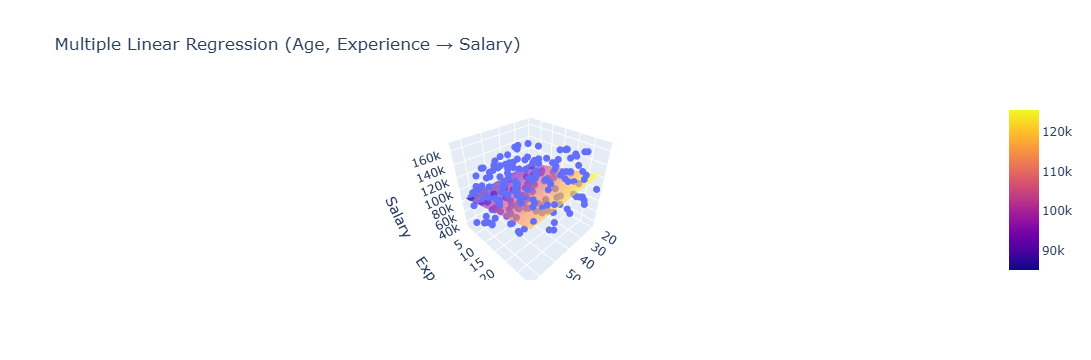

In [43]:
import plotly.graph_objects as go

# Create grid
age_range = np.linspace(X["Age"].min(), X["Age"].max(), 20)
exp_range = np.linspace(X["Experience"].min(), X["Experience"].max(), 20)

age_grid, exp_grid = np.meshgrid(age_range, exp_range)

# Predict salary for plane
salary_plane = (
    mlr.intercept_
    + mlr.coef_[0] * age_grid
    + mlr.coef_[1] * exp_grid
)

# Scatter actual test points
scatter = go.Scatter3d(
    x=X_test["Age"],
    y=X_test["Experience"],
    z=y_test,
    mode="markers",
    name="Actual Data",
    marker=dict(size=4)
)

# Regression plane surface
surface = go.Surface(
    x=age_grid,
    y=exp_grid,
    z=salary_plane,
    opacity=0.6,
    name="Regression Plane"
)

# Layout
layout = go.Layout(
    title="Multiple Linear Regression (Age, Experience → Salary)",
    scene=dict(
        xaxis_title="Age",
        yaxis_title="Experience",
        zaxis_title="Salary"
    )
)

# Figure
fig = go.Figure(data=[scatter, surface], layout=layout)

fig.show()
